Import train and test dataset on which we need to perform the analysis.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_train = pd.read_csv("D:\\Tarun\\UTS\\Subjects\\ADV ML\\NBA-Drafted-Player\\src\\models\\train.csv")
df_test = pd.read_csv("D:\\Tarun\\UTS\\Subjects\\ADV ML\\NBA-Drafted-Player\\src\\models\\test.csv")

Analyse the dataset and its features. This will help to understand which features we need to select for the model.

In [99]:
df_train.head(5)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [100]:
print(df_train.shape)
print(df_test.shape)

(56091, 64)
(4970, 63)


In [12]:
df_train.dtypes

team                    object
conf                    object
GP                       int64
Min_per                float64
Ortg                   float64
usg                    float64
eFG                    float64
TS_per                 float64
ORB_per                float64
DRB_per                float64
AST_per                float64
TO_per                 float64
FTM                      int64
FTA                      int64
FT_per                 float64
twoPM                    int64
twoPA                    int64
twoP_per               float64
TPM                      int64
TPA                      int64
TP_per                 float64
blk_per                float64
stl_per                float64
ftr                    float64
yr                      object
ht                      object
num                     object
porpag                 float64
adjoe                  float64
pfr                    float64
year                     int64
type                    object
Rec_Rank

Replace the None object values to NA for the missing data treatment.

In [101]:
df_train = df_train.replace('None', pd.NA)
df_test = df_test.replace('None', pd.NA)

Check the missing data features with the count of missing data values. This will help to understand which columns needs to be treated for missing data.

In [102]:
df_train.isna().sum()

team                       0
conf                       0
GP                         0
Min_per                    0
Ortg                       0
usg                        0
eFG                        0
TS_per                     0
ORB_per                    0
DRB_per                    0
AST_per                    0
TO_per                     0
FTM                        0
FTA                        0
FT_per                     0
twoPM                      0
twoPA                      0
twoP_per                   0
TPM                        0
TPA                        0
TP_per                     0
blk_per                    0
stl_per                    0
ftr                        0
yr                       292
ht                        98
num                     4690
porpag                     0
adjoe                      0
pfr                        0
year                       0
type                       0
Rec_Rank               39055
ast_tov                 4190
rimmade       

In [103]:
cols_to_drop = ['yr', 'ht', 'num']

In this experiment for the preprocessing and feature selection, I have dropped only irrelevant features.

**yr** - student year of study. AS we are comparing the matches and goals, so year of study is not needed for analysis.

**ht** - height of student. Height of student does not matters to analyse its performance.

**num** - number of the player as it is not relevant.

In [104]:
df_train = df_train.drop(df_train.columns.intersection(cols_to_drop), axis=1)
df_test = df_test.drop(df_test.columns.intersection(cols_to_drop), axis=1)

Now, check the missing data columns in the assending order which needs to get a treatment.

In [105]:
missing_data_train = df_train.isna().sum().sort_values(ascending=False)
missing_data_test = df_test.isna().sum().sort_values(ascending=False)

In [106]:
missing_data_test

pick                   4921
Rec_Rank               3536
dunks_ratio            2717
mid_ratio               697
rim_ratio               646
ast_tov                 537
rimmade_rimmiss         248
midmade                 248
midmade_midmiss         248
dunksmade               248
dunksmiss_dunksmade     248
rimmade                 248
adrtg                     1
stops                     1
drtg                      1
dporpag                   1
bpm                       1
obpm                      1
dbpm                      1
gbpm                      1
ogbpm                     1
dgbpm                     1
dreb                      0
ast                       0
stl                       0
mp                        0
blk                       0
pts                       0
oreb                      0
treb                      0
team                      0
conf                      0
FT_per                    0
GP                        0
Min_per                   0
Ortg                

For the missing values, I have replaced the missing values to mean and mode of the feature on the basis of its dtypes.

In [107]:
def remove_missing_data(col, df):
    if df[col].dtypes == 'object':
        df[col] = df[col].fillna(df[col].mode())
    else:
        df[col] = df[col].fillna(df[col].mean())
    return df

In [108]:
def missing_data_treatment(missing_data, df):
    i = 0
    while missing_data.values[i] > 0:
        df = remove_missing_data(missing_data.keys()[i], df)
        i += 1
    return df

In [109]:
df_train = missing_data_treatment(missing_data_train, df_train)
df_test = missing_data_treatment(missing_data_test, df_test)

In [110]:
print(df_train.shape)
print(df_test.shape)

(56091, 61)
(4970, 60)


Seperate the X and Y train dataset and spilt the train dataset into train and test.

In [111]:
df_X_train = df_train.drop('drafted', axis='columns')

In [112]:
df_Y_train = df_train.drafted

Now perform the LabelEnconding on the categorical features, Using the LabelEncoder to transform the string into numeric.

In [113]:
from sklearn.preprocessing import LabelEncoder
le_player_id = LabelEncoder()
le_team = LabelEncoder()
le_conf = LabelEncoder()
le_type = LabelEncoder()

In [114]:
df_X_train['le_team'] = le_team.fit_transform(df_X_train['team'])
df_test['le_team'] = le_team.fit_transform(df_test['team'])

df_X_train['le_conf'] = le_conf.fit_transform(df_X_train['conf'])
df_test['le_conf'] = le_conf.fit_transform(df_test['conf'])

df_X_train['le_type'] = le_type.fit_transform(df_X_train['type'])
df_test['le_type'] = le_type.fit_transform(df_test['type'])

In [115]:
df_player_id_train = df_X_train.player_id
df_player_id_test = df_test.player_id

df_X_train = df_X_train.drop(['player_id', 'team', 'conf', 'type'], axis='columns')
df_test = df_test.drop(['player_id', 'team', 'conf', 'type'], axis='columns')

In [118]:
df_X_train.head(5)

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,le_team,le_conf,le_type
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,0.258086,89.3938,2.5,2009,53.456363,1.823646,28.066087,47.05249,14.494741,40.523115,0.56408,0.323633,3.836553,4.311618,0.86357,33.25469,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,267,27,0
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,1.334920,100.0660,3.4,2009,53.456363,1.631621,28.066087,47.05249,14.494741,40.523115,0.56408,0.323633,3.836553,4.311618,0.86357,33.25469,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,327,33,0
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,2.274070,104.1070,1.7,2009,53.456363,1.081662,28.066087,47.05249,14.494741,40.523115,0.56408,0.323633,3.836553,4.311618,0.86357,33.25469,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,272,7,0
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,0.552857,93.2086,2.0,2009,53.456363,0.942830,28.066087,47.05249,14.494741,40.523115,0.56408,0.323633,3.836553,4.311618,0.86357,33.25469,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,231,34,0
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,1.060130,97.8554,3.8,2009,53.456363,0.491229,28.066087,47.05249,14.494741,40.523115,0.56408,0.323633,3.836553,4.311618,0.86357,33.25469,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,228,10,0


Now, to scale the dataset, I am performing Normalization as the dataset is in the different set of range and to scale, I am performing the Normalization.

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
norm = MinMaxScaler().fit(df_X_train)

In [121]:
X_train_norm = norm.transform(df_X_train)
X_test_norm = norm.transform(df_test)

In [125]:
print(X_train_norm.shape)
print(X_test_norm.shape)

(56091, 59)
(4970, 59)


By using train_test_split, divide the train data into train-test dataset.

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train_norm, df_Y_train, train_size=0.8)
X_test.shape

(11219, 59)

Now, Perform the Decision Tress model for the data modelling.

In [164]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [165]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [166]:
y_pred = model.predict_proba(X_test)

In [167]:
predicted = model.predict(X_test)

In [168]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [169]:
y_pred

array([[1.000000, 0.000000],
       [1.000000, 0.000000],
       [0.000000, 1.000000],
       ...,
       [1.000000, 0.000000],
       [1.000000, 0.000000],
       [1.000000, 0.000000]])

Check the model performance on the test data of train-test split technique.

In [170]:
model.score(X_test, Y_test)

0.9917104911311169

In [171]:
from sklearn.model_selection import cross_val_score
print("cross val score - Random Forest Classifier - ",
          cross_val_score(tree.DecisionTreeClassifier(), df_X_train, df_Y_train, cv = 5))

cross val score - Random Forest Classifier -  [0.991532 0.990283 0.992423 0.990997 0.992155]


To measure the accuracy of model, perform the MSE and MAE with the predicted variable and target variable.

In [172]:
from sklearn.metrics import (
    mean_absolute_error, # MAE
    mean_squared_error # MSE
)

In [173]:
MAE = mean_absolute_error(
    y_true=Y_test, # actual values
    y_pred=predicted # predicted values
)
MAE.round(2)

0.01

In [174]:
MSE = mean_squared_error(
    y_true=Y_test, # actual values
    y_pred=predicted # predicted values
)
MSE.round(2)

0.01

Draw the confusion matrix of predicted value and the actual value.

In [175]:
from sklearn.metrics import confusion_matrix

In [176]:
cm = confusion_matrix(Y_test, predicted)
cm

array([[11067,    44],
       [   49,    59]], dtype=int64)

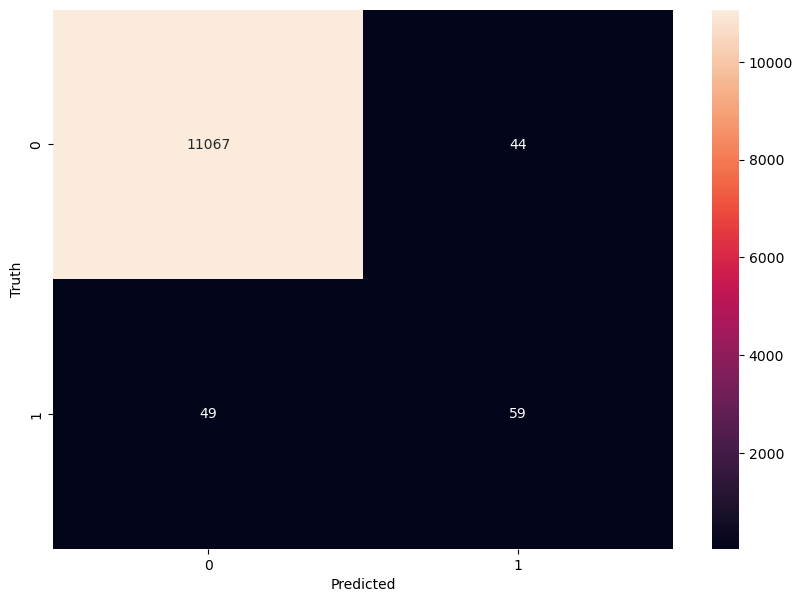

In [177]:
from matplotlib import pyplot as plt
import seaborn as sb
plt.figure(figsize=(10, 7))
sb.heatmap(cm,annot=True,fmt='g')
# sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Now, draw AUROC curve to check the performance of the model.

In [178]:
y_pred_test = model.predict_proba(df_test)

D:\Tarun\Anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [185]:
from sklearn.metrics import roc_curve

In [186]:
fpr, tpr, thresh = roc_curve(Y_test, y_pred[:,1], pos_label=1)

In [187]:
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [188]:
from sklearn.metrics import roc_auc_score

In [190]:
print(auc_score)

0.7711681283479501


In [191]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

D:\Tarun\TemporaryFiles\ipykernel_7960\4098886997.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [189]:
auc_score = roc_auc_score(Y_test, y_pred[:,1])

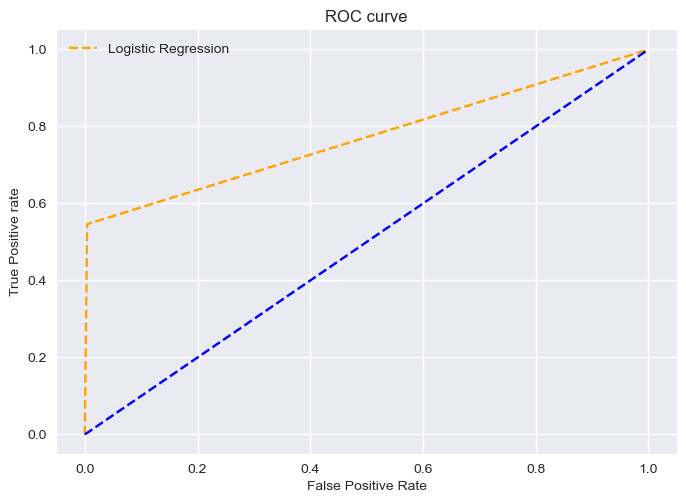

In [192]:
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Now, predict the target value on the actual test dataset.

In [179]:
y_pred_test

array([[1.000000, 0.000000],
       [0.000000, 1.000000],
       [1.000000, 0.000000],
       ...,
       [0.000000, 1.000000],
       [0.000000, 1.000000],
       [0.000000, 1.000000]])

In [180]:
df_result = pd.DataFrame()

In [181]:
df_result['player_id'] = df_player_id_test

In [182]:
df_result.shape

(4970, 1)

In [183]:
df_result['drafted'] = y_pred_test[:,1]

In [184]:
result_csv_data = df_result.to_csv('D:\\Tarun\\UTS\\Subjects\\ADV ML\\advmla-2023-spring\\result_csv_data_comp_3.csv', index = True)